In [46]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import matplotlib
import scipy.optimize as opt
from sklearn.metrics import classification_report#这个包是评价报告

In [47]:
def load_data(path, transpose=True):
    data = sio.loadmat(path)
    y = data.get('y')  # (5000,1)
    y = y.reshape(y.shape[0])  # make it back to column vector

    X = data.get('X')  # (5000,400)

    if transpose:
        # for this dataset, you need a transpose to get the orientation right
        X = np.array([im.reshape((20, 20)).T for im in X])

        # and I flat the image again to preserve the vector presentation
        X = np.array([im.reshape(400) for im in X])

    return X, y

In [48]:
X, y = load_data('ex3data1.mat')

X.shape, y.shape

((5000, 400), (5000,))

In [49]:
def plot_an_image(image):

    fig, ax = plt.subplots(figsize=(1, 1))
    ax.matshow(image.reshape((20, 20)), cmap=matplotlib.cm.binary)
    #colormaps.binary连续化色彩图
    plt.xticks(np.array([])) 
    #Get or set the current tick locations and labels of the x-axis.
    #ticks:array-like, optional  The list of xtick locations. Passing an empty list removes all xticks.
    plt.yticks(np.array([]))

8


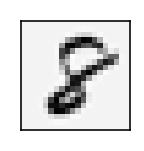

In [50]:
pick_one = np.random.randint(0, 5000)
plot_an_image(X[pick_one, :])
plt.show()
print('{}'.format(y[pick_one]))

In [51]:
def plot_100_image(X):
    """ sample 100 image and show them
    assume the image is square

    X : (5000, 400)
    """

    size = int(np.sqrt(X.shape[1])) #sqrt开根号
    sample_idx = np.random.choice(np.arange(X.shape[0]), 100)
    sample_images = X[sample_idx, :]

    fig, ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(8, 8))

    for r in range(10):
        for c in range(10):
            ax_array[r, c].matshow(sample_images[10 * r + c].reshape((size, size)), cmap = matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            #用于消去刻度和数字


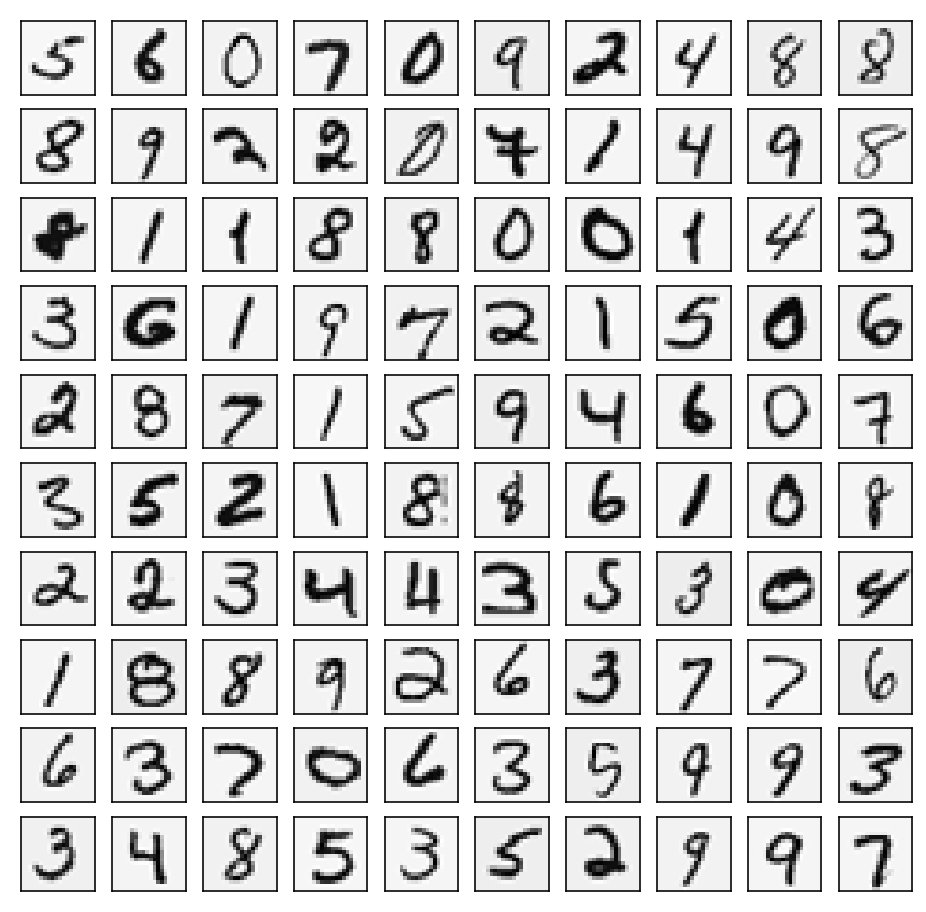

In [52]:
plot_100_image(X)
plt.show()

In [53]:
raw_X, raw_y = load_data('ex3data1.mat')


# 准备数据

In [55]:
X = np.insert(raw_X, 0, values=np.ones(raw_X.shape[0]), axis=1)
X.shape


(5000, 401)

In [ ]:
y_matrix = []

for k in range(1, 11):
    y_matrix.append((raw_y == k).astype(int))

y_matrix = [y_matrix[-1]]